In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cancer = load_breast_cancer()     
df_features = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df = df_features.copy()
df['target'] = pd.Series(cancer.target)

EDA

/home/barnabas/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


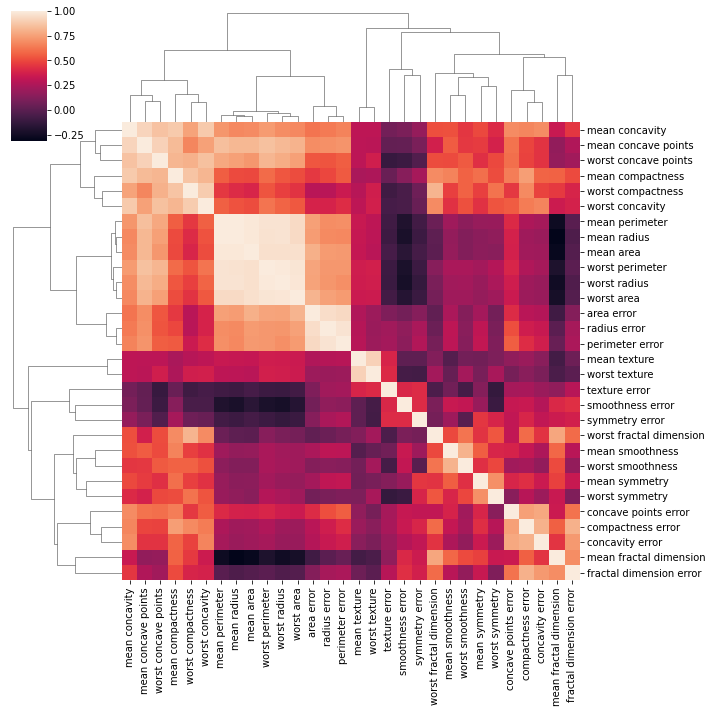

In [8]:
corrMatrix = df_features.corr() # create correlation matrix
sns.clustermap(corrMatrix, annot=False, square=True)
plt.show()

/home/barnabas/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


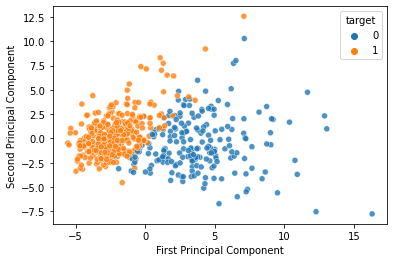

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalise the data - z = (x-standard deviation)/mean 
scaler.fit(df_features)
scaled_data = scaler.transform(df_features)


from sklearn.decomposition import PCA

# initialise PCA module
pca = PCA(n_components=3)

# fit to data
pca.fit(scaled_data)

# transform data with eigenvalues
x_pca = pca.transform(scaled_data)

# Plot Principle component one and two
fig = plt.figure()
#ax = sns.set(rc={"figure.figsize":(8, 8)})
#ax = fig.add_subplot(111, projection = '3d')
ax = sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=df['target'],alpha = 0.8,sizes=(1000, 1000))
ax = plt.xlabel('First Principal Component')
ax = plt.ylabel('Second Principal Component')
#ax = plt.legend(title='Solubility')
plt.savefig('PCA.png',dpi =100)

In [21]:
# Import the module
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

y = df["target"].values
X = x_pca

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=9)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9210526315789473
[[39  3]
 [ 4 68]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



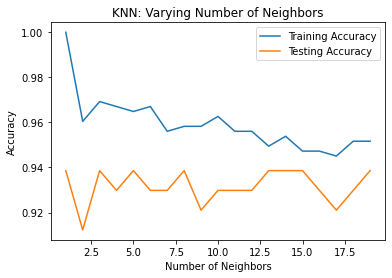

In [20]:
neighbors = np.arange(1, 20)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
#print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()